# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hadeel Yasser

ID: 49-8371

Tutorial: 06

---

Name: Hania Elkhayat

ID: 49-1150

Tutorial: 06

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


# **Dataset Inspection**

In [3]:
# data type of each variable/dimension
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [4]:
# Are there any null values in any of the columns?
df.isnull().any().any()

False

In [5]:
# to know the number of unique values in each column, the most common value and its frequency
# most common is the top value
df.describe(include='all')

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
unique,NaN,2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,21st century classical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.833165,NaN,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,NaN,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,NaN,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,NaN,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,NaN,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,NaN,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000


# **Data Cleaning**

In [6]:
# changing the duration ms to represented in millions of units
df['duration_ms'] =df['duration_ms'] / 1e6
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,0.160298,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,0.115177,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,0.232881,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,0.190629,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,0.258099,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,0.206320,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,0.306073,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,0.198417,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [7]:
#Renaming the column after converting
df.columns = df.columns.str.replace('duration_ms', 'duration_ms in millions')
df.head()

,mode,genres,acousticness,danceability,duration_ms in millions,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,0.160298,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,0.115177,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,0.232881,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,0.190629,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [8]:
# converting from milli second to minutes
df['duration_ms in millions'] =(df['duration_ms in millions'] /(1000*60))%60
df.head()

,mode,genres,acousticness,danceability,duration_ms in millions,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,0.000003,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,0.000017,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,0.000002,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,0.000004,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,0.000003,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [9]:
#Converting into minutes
df['duration_ms in millions'] =(df['duration_ms in millions'] * (10**6))
df.head()

,mode,genres,acousticness,danceability,duration_ms in millions,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,3.881348,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [10]:
#Renaming the duration column
df.columns = df.columns.str.replace('duration_ms in millions', 'duration in minutes')
df.head()

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,3.881348,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [11]:
#vieiwng which are the unique values in genres --> almost uniuqe for every record
df['genres'].unique()

array(['21st century classical', '432hz', '8-bit', ..., 'zouk',
       'zurich indie', 'zydeco'], dtype=object)

In [12]:
#dropping the records that had [] --> meaningless data
df = df[df.genres != '[]']
df

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,a cappella,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,5.719942,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,4.301651,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,3.438667,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,5.101213,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,3.306956,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [13]:
# reseting the index after dropping unneeded rows
df.reset_index(drop = True, inplace = True)

In [14]:
df['genres'].unique()

array(['21st century classical', '432hz', '8-bit', ..., 'zouk',
       'zurich indie', 'zydeco'], dtype=object)

# **Data Visualization**

**Question 1**

*What* are the 5 most popular music genres?

In [15]:
#sorting the DF based on popularity to get the most popular genres ans saving it in new DF
sortedDf = df.sort_values(by=['popularity'],ascending=False)
topGenres=sortedDf.head()
topGenres

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
236,1,basshall,0.213167,0.818,2.829986,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2532,1,south african house,0.043833,0.847,5.197572,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2754,1,trap venezolano,0.044600,0.877,3.864133,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2777,0,turkish edm,0.008290,0.698,3.111667,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
535,0,chinese electropop,0.002570,0.660,3.618133,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1


Text(0.5, 0, 'genre')

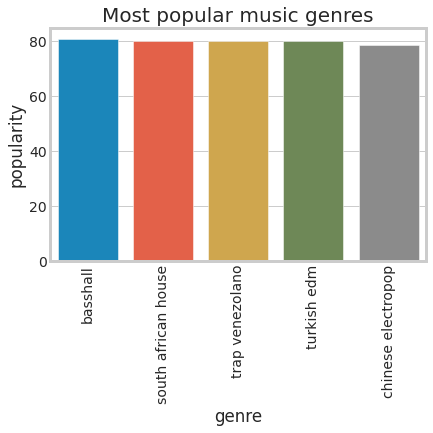

In [16]:
#Plotting the new DF containing the most popular 5 genres
g = sns.barplot(x=topGenres['genres'], y='popularity', data=topGenres)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Most popular music genres', size=20)
plt.ylabel('popularity')
plt.xlabel('genre')

**Q1 Answer:**

After sorting the df based on the popularity, it is inspected that basshall,south african house, trap venezolano, turkish edm and chinese electropop are the most popular music genres

**Question 2**

What factors affect the Popularity of the song?

In [17]:
# genre wasn't included in the correlation because no genre was repeated hence no correlation could be found with the popularity
corr = df.corr()
corr_popularity = corr['popularity'].sort_values(ascending=False, key=lambda x: x.abs())
corr_popularity

popularity             1.000000
acousticness          -0.458546
loudness               0.344315
energy                 0.337657
instrumentalness      -0.265516
danceability           0.218019
tempo                  0.146617
liveness              -0.094092
duration in minutes   -0.071111
speechiness           -0.045112
mode                  -0.031067
valence                0.023117
key                    0.008700
Name: popularity, dtype: float64

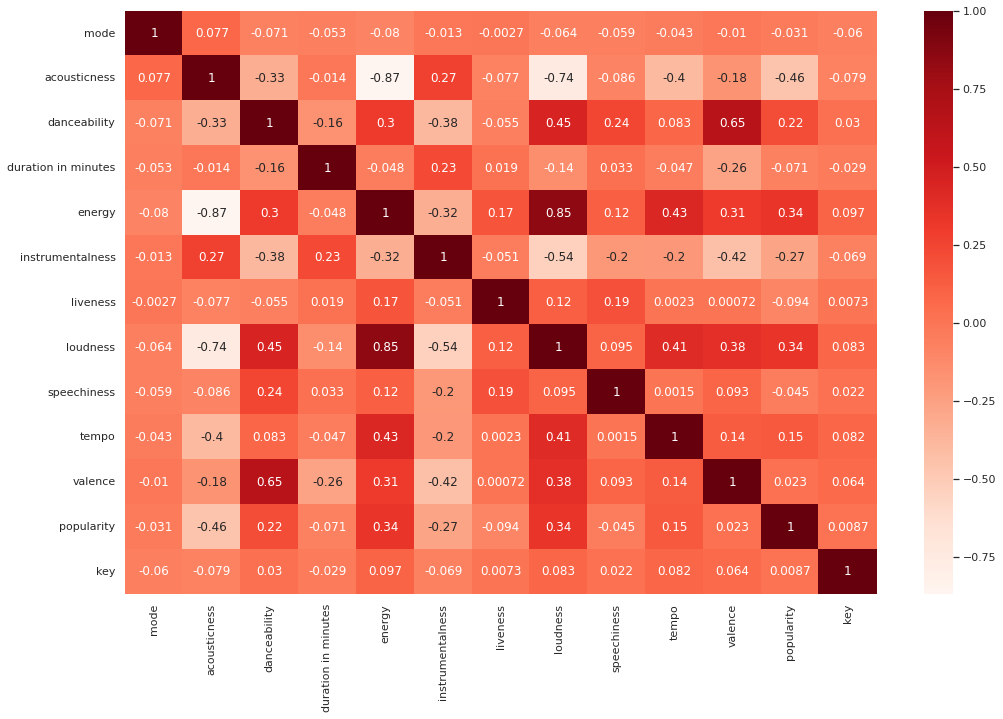

In [18]:
#Plotting heatmap correlation 
corr = df.corr()
plt.figure(figsize = (15,10))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, cmap='Reds');

**Q2 Answer:**

Most affecting factors on popularity are acousticness and loudness where when acousticness increases, popularity decreases by 0.45. When loudness increases,popularity increases 0.34. Hence people prefer songs with low electrical amplifications but are still loud enough for their taste.

**Question 3**

Which genre has the highest energy and which has the lowest?

In [19]:
df_copy=df.copy()
df_copy.head()

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,a cappella,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,1,abstract,0.459210,0.516167,5.719942,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In [20]:
#getting the record with maximum energy value
maxEnergy=df_copy[df_copy.energy == df_copy.energy.max()]
maxEnergy

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
174,0,australian ska,0.000096,0.312667,3.528744,0.994667,0.000183,0.1561,-4.356,0.158667,148.061,0.2289,43.333333,9


In [21]:
#getting the record with minimum energy value
minEnergy=df_copy[df_copy.energy == df_copy.energy.min()]
minEnergy

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
282,1,binaural,0.9935,0.4395,2.036242,0.001002,0.8025,0.109,-41.825,0.0795,68.144,0.1841,59.0,3
327,1,brain waves,0.9935,0.4395,2.036242,0.001002,0.8025,0.109,-41.825,0.0795,68.144,0.1841,59.0,3


In [22]:
#Joining both records
newDataframe=maxEnergy.append(minEnergy,ignore_index=True)
newDataframe

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,0,australian ska,0.000096,0.312667,3.528744,0.994667,0.000183,0.1561,-4.356,0.158667,148.061,0.2289,43.333333,9
1,1,binaural,0.993500,0.439500,2.036242,0.001002,0.802500,0.1090,-41.825,0.079500,68.144,0.1841,59.000000,3
2,1,brain waves,0.993500,0.439500,2.036242,0.001002,0.802500,0.1090,-41.825,0.079500,68.144,0.1841,59.000000,3


Text(0.5, 0, 'Genre')

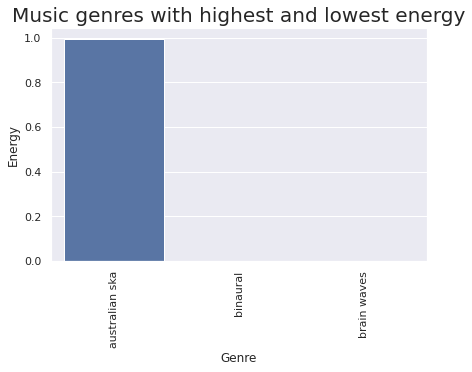

In [23]:
#Plotting the newDataFrame
g = sns.barplot(x=newDataframe['genres'], y='energy', data=newDataframe)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Music genres with highest and lowest energy', size=20)
plt.ylabel('Energy')
plt.xlabel('Genre')

The min energy is 0.001 and the max energy is 0.99; therefore, the lowest records are relativley not large enough to be viewed in the same barplot with the highest energy. Because of that we decided to plot each one in a seprate garphs as below. 

In [24]:
#sorting the dataframe on enegry descendingly
sortedDf = df_copy.sort_values(by=['energy'],ascending=False)
highEnergy=sortedDf.head()
highEnergy

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
174,0,australian ska,0.000096,0.312667,3.528744,0.994667,0.000183,0.1561,-4.356,0.158667,148.061,0.228900,43.333333,9
2705,1,tennessee metal,0.000891,0.372000,4.400222,0.994333,0.040620,0.1780,-4.621,0.192667,122.180,0.105967,46.000000,11
1896,0,nederlandse hardstyle,0.076200,0.341000,3.963633,0.994000,0.000000,0.3520,0.060,0.374000,157.607,0.220000,0.000000,1
347,0,brazilian ska,0.500000,0.320000,2.869600,0.991000,0.000004,0.2260,-7.047,0.220000,167.532,0.545000,13.000000,9
912,1,dutch death metal,0.000040,0.306000,4.651550,0.989000,0.000410,0.2700,-5.087,0.109000,103.006,0.134000,38.000000,2


Text(0.5, 0, 'Genre')

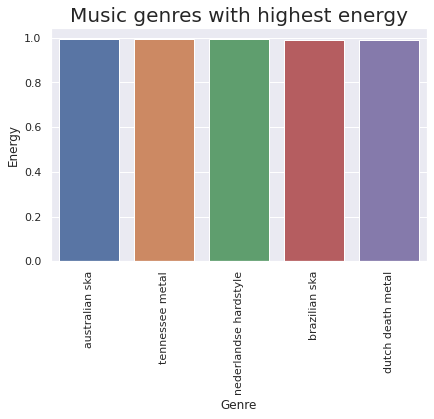

In [25]:
g = sns.barplot(x=highEnergy['genres'], y='energy', data=highEnergy)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Music genres with highest energy', size=20)
plt.ylabel('Energy')
plt.xlabel('Genre')

In [26]:
#getting the least energy
lowEnergy=sortedDf.tail()
lowEnergy

,mode,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
1722,1,medieval,0.9950,0.5330,2.267867,0.004440,0.7960,0.1110,-29.4720,0.06040,80.919,0.1760,0.0,8
2475,1,singing bowl,0.9160,0.0569,9.245783,0.004130,0.9710,0.1200,-30.6840,0.05750,56.436,0.0245,45.0,3
1610,1,korean classical piano,0.9935,0.3795,2.265225,0.003950,0.9465,0.0986,-37.6195,0.05245,68.906,0.3495,49.0,8
327,1,brain waves,0.9935,0.4395,2.036242,0.001002,0.8025,0.1090,-41.8250,0.07950,68.144,0.1841,59.0,3
282,1,binaural,0.9935,0.4395,2.036242,0.001002,0.8025,0.1090,-41.8250,0.07950,68.144,0.1841,59.0,3


Text(0.5, 0, 'Genre')

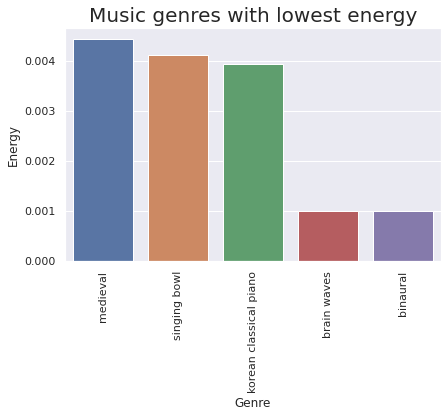

In [27]:
g = sns.barplot(x=lowEnergy['genres'], y='energy', data=lowEnergy)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Music genres with lowest energy', size=20)
plt.ylabel('Energy')
plt.xlabel('Genre')

**Q3 Answer:**

The music genre with the highest energy is australian ska and the one with the lowest energy is binaural and brain waves.

**Question 4** \
What are the most correlated pairs of attributes ?

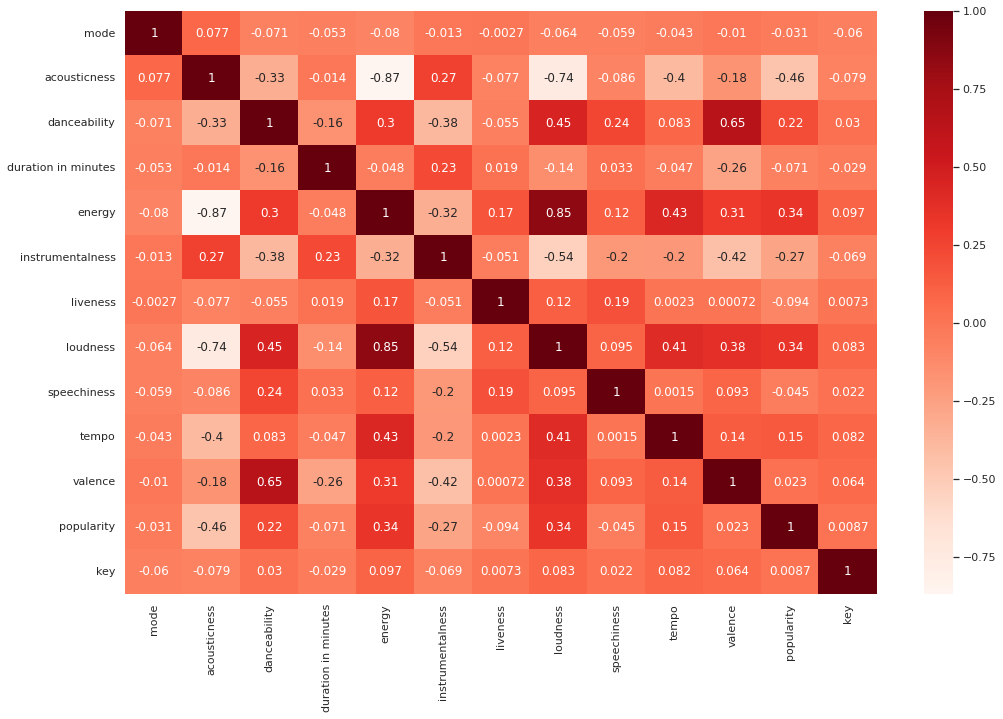

In [28]:
# plotting a heat map aganist all the numeric attributes without the genres for the same reason mentioned before
corr = df.corr()
plt.figure(figsize = (15,10))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, cmap='Reds');

In [29]:
corr

,mode,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,1.000000,0.077240,-0.071234,-0.053170,-0.080268,-0.012659,-0.002692,-0.063660,-0.059175,-0.042880,-0.010274,-0.031067,-0.060159
acousticness,0.077240,1.000000,-0.325010,-0.014024,-0.868257,0.273774,-0.076653,-0.737279,-0.086229,-0.397669,-0.178256,-0.458546,-0.078907
danceability,-0.071234,-0.325010,1.000000,-0.160638,0.299788,-0.383103,-0.055143,0.453064,0.242061,0.082864,0.652549,0.218019,0.029557
duration in minutes,-0.053170,-0.014024,-0.160638,1.000000,-0.048202,0.229421,0.018643,-0.137600,0.033247,-0.046865,-0.257512,-0.071111,-0.029289
energy,-0.080268,-0.868257,0.299788,-0.048202,1.000000,-0.324964,0.168303,0.848966,0.119862,0.430789,0.305207,0.337657,0.097237
instrumentalness,-0.012659,0.273774,-0.383103,0.229421,-0.324964,1.000000,-0.050614,-0.537682,-0.196764,-0.201670,-0.424091,-0.265516,-0.069315
liveness,-0.002692,-0.076653,-0.055143,0.018643,0.168303,-0.050614,1.000000,0.123981,0.190112,0.002318,0.000720,-0.094092,0.007279
loudness,-0.063660,-0.737279,0.453064,-0.137600,0.848966,-0.537682,0.123981,1.000000,0.095334,0.407962,0.376596,0.344315,0.083029
speechiness,-0.059175,-0.086229,0.242061,0.033247,0.119862,-0.196764,0.190112,0.095334,1.000000,0.001482,0.092671,-0.045112,0.022294
tempo,-0.042880,-0.397669,0.082864,-0.046865,0.430789,-0.201670,0.002318,0.407962,0.001482,1.000000,0.139605,0.146617,0.081648


**Q4 Answer:** \
The first pair is acousticness with energy such that if acousticness increases where the electrical amplification gets higher, the energy of the song decreases with 0.87 because there is a high negative correlation between the attributes (-0.87). \
The second most correlated pairs are loudness with energy where there is high positive correlation between the pairs such that as the loudness of a song increases, its energy increases with 0.85 and vice versa. 


# **Data Preprocessing**

**1. Feature Selection**


In [30]:
#Dropping the genres column because it is unique for every record and including it might reduce the accuracy of clustering
copiedDf=df.copy()
copiedDf=copiedDf.drop('genres',axis=1)
copiedDf.head()

,mode,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,1,0.459210,0.516167,5.719942,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In [31]:
# dropping some features that aren't highly correlated with the other independent variables (feature selection)
copiedDf=copiedDf.drop('key',axis=1)
copiedDf=copiedDf.drop('speechiness',axis=1)
copiedDf=copiedDf.drop('liveness',axis=1)
copiedDf=copiedDf.drop('duration in minutes',axis=1)
copiedDf.head()

,mode,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
0,1,0.979333,0.162883,0.071317,0.606834,-31.514333,75.336500,0.103783,27.833333
1,1,0.494780,0.299333,0.450678,0.477762,-16.854000,120.285667,0.221750,52.500000
2,1,0.762000,0.712000,0.818000,0.876000,-9.180000,133.444000,0.975000,48.000000
3,1,0.676557,0.538961,0.316434,0.003003,-12.479387,112.110362,0.448249,45.820071
4,1,0.459210,0.516167,0.442417,0.849667,-15.472083,127.885750,0.307325,43.500000


In [32]:
# there are only 2 variations hence they won't affect clustering that much (low variance between the data) + low correlation
copiedDf=copiedDf.drop('mode',axis=1) 
copiedDf.head()

,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
0,0.979333,0.162883,0.071317,0.606834,-31.514333,75.336500,0.103783,27.833333
1,0.494780,0.299333,0.450678,0.477762,-16.854000,120.285667,0.221750,52.500000
2,0.762000,0.712000,0.818000,0.876000,-9.180000,133.444000,0.975000,48.000000
3,0.676557,0.538961,0.316434,0.003003,-12.479387,112.110362,0.448249,45.820071
4,0.459210,0.516167,0.442417,0.849667,-15.472083,127.885750,0.307325,43.500000


**2. Normalize the Numeric data**

In [33]:
#The remaining numerical columns
numerical_columns = ['acousticness', 'danceability', 'energy', 
                     'instrumentalness'  , 'loudness', 'tempo' , 'valence', 'popularity']
copiedDf.head()

,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
0,0.979333,0.162883,0.071317,0.606834,-31.514333,75.336500,0.103783,27.833333
1,0.494780,0.299333,0.450678,0.477762,-16.854000,120.285667,0.221750,52.500000
2,0.762000,0.712000,0.818000,0.876000,-9.180000,133.444000,0.975000,48.000000
3,0.676557,0.538961,0.316434,0.003003,-12.479387,112.110362,0.448249,45.820071
4,0.459210,0.516167,0.442417,0.849667,-15.472083,127.885750,0.307325,43.500000


In [34]:
 #Z-Score Normalization
from sklearn.preprocessing import StandardScaler

copiedDf[numerical_columns] = StandardScaler().fit_transform(copiedDf[numerical_columns])
copiedDf.head()

,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
0,1.808342,-2.484320,-2.089264,1.479319,-3.912215,-2.500701,-1.927254,-0.722139
1,0.292822,-1.578684,-0.471323,0.996498,-1.181715,0.072407,-1.342738,0.750932
2,1.128597,1.160236,1.095268,2.486190,0.247574,0.825654,2.389557,0.482196
3,0.861361,0.011756,-1.043864,-0.779432,-0.366940,-0.395587,-0.220455,0.352012
4,0.181571,-0.139535,-0.506559,2.387685,-0.924332,0.507473,-0.918720,0.213460


**Testing the clustering algorithm without dropping any variables except for  genres to view the difference in the Within-Cluster Sum of Square error (WCSS)**

In [35]:
originalDf=df.copy()
originalDf=originalDf.drop('genres',axis=1)
originalDf.head()

,mode,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,1,0.459210,0.516167,5.719942,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In [36]:
numerical_columns = ['acousticness', 'danceability', 'energy', 'mode' ,'liveness','speechiness'
                     ,'duration in minutes','key','instrumentalness'  , 'loudness', 'tempo' , 'valence', 'popularity']
originalDf[numerical_columns] = StandardScaler().fit_transform(originalDf[numerical_columns])
originalDf.head()

,mode,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,0.447575,1.808342,-2.484320,-0.965911,-2.089264,1.479319,1.827840,-3.912215,-0.534445,-2.500701,-1.927254,-0.722139,0.018282
1,0.447575,0.292822,-1.578684,8.421635,-0.471323,0.996498,-0.669062,-1.181715,-0.084032,0.072407,-1.342738,0.750932,-0.278625
2,0.447575,1.128597,1.160236,-1.442591,1.095268,2.486190,-0.723202,0.247574,-0.454509,0.825654,2.389557,0.482196,0.315189
3,0.447575,0.861361,0.011756,-0.645480,-1.043864,-0.779432,-0.222369,-0.366940,-0.009049,-0.395587,-0.220455,0.352012,0.315189
4,0.447575,0.181571,-0.139535,0.966332,-0.506559,2.387685,-0.809102,-0.924332,-0.460515,0.507473,-0.918720,0.213460,-1.466255


# **Modeling**



**1. Finding the clusters**

**Showing the difference in the within cluster errors (wcss) between the df with dropped variables and original df**

We have chosen 1-12 range in the elbow method because when we tested 1-20 range, it resulted in the same number of optimum clusters as 1-12 range but with lowest WCSS. And to avoid overfitting, we chose the smaller range

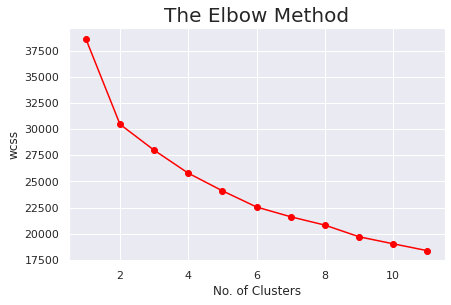

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(originalDf)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 12), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Based on the Elbow method, we can deduce that dropping the variables helped in reducing the wcss

(Check the Y-Axis in the below and above graphs)

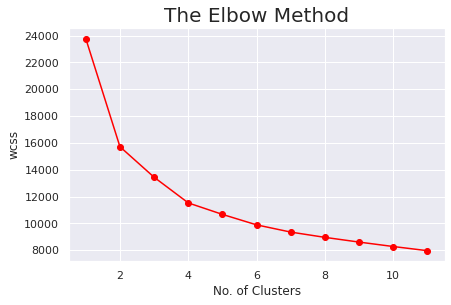

In [38]:
wcss = []
for i in range(1, 12):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(copiedDf)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 12), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

After viewing the above elbow method, we have chosen 5 clusters as after 5, the curve gradient starts to get smaller and the line starts to get flatter

**2. Fitting the model**

In [39]:
# fitting the model
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(copiedDf)

labels = km.labels_
labels

array([1, 1, 0, ..., 0, 2, 0], dtype=int32)

In [40]:
# inserting back the genres column in index 0
copiedDf.insert(loc=0, column='genres', value=df['genres'])
copiedDf.head()

,genres,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
0,21st century classical,1.808342,-2.484320,-2.089264,1.479319,-3.912215,-2.500701,-1.927254,-0.722139
1,432hz,0.292822,-1.578684,-0.471323,0.996498,-1.181715,0.072407,-1.342738,0.750932
2,8-bit,1.128597,1.160236,1.095268,2.486190,0.247574,0.825654,2.389557,0.482196
3,a cappella,0.861361,0.011756,-1.043864,-0.779432,-0.366940,-0.395587,-0.220455,0.352012
4,abstract,0.181571,-0.139535,-0.506559,2.387685,-0.924332,0.507473,-0.918720,0.213460


In [41]:
# We'll assign the cluster labels to a new column called 'clusters' in our copied dataframe
copiedDf.insert(loc=1, column='clusters', value=labels)
# You can avoid pandas' output truncation by setting the four options below.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

copiedDf.groupby('clusters').describe()

acousticness                                                    \
                count      mean       std       min       25%       50%   
clusters                                                                  
0               923.0 -0.562294  0.485677 -1.254463 -0.913881 -0.659494   
1               381.0  1.421540  0.501648 -1.002392  1.234381  1.610257   
2               402.0  1.165796  0.532166 -1.252919  0.880654  1.206071   
3               642.0 -0.992041  0.317406 -1.254675 -1.237432 -1.099584   
4               624.0  0.233383  0.576204 -1.225127 -0.195053  0.224300   

                             danceability                                \
               75%       max        count      mean       std       min   
clusters                                                                  
0        -0.290403  1.250575        923.0  0.915637  0.560315 -0.684885   
1         1.765787  1.860470        381.0 -1.399949  0.675611 -3.187745   
2         1.587074  1.855466        402.0  0.016121  0.730276 -2.596377   
3        -0.869981  0.906532        642.0 -0.524560  0.787617 -2.496820   
4         0.625216  1.832321        624.0  0.029702  0.566227 -1.720276   

                                                 energy                      \
               25%       50%       75%       max  count      mean       std   
clusters                                                                      
0         0.528782  0.936100  1.308194  2.600492  923.0  0.525079  0.423528   
1        -1.789883 -1.432517 -0.995070  0.801831  381.0 -1.602976  0.520718   
2        -0.368423  0.043290  0.461254  2.295184  402.0 -0.827869  0.585958   
3        -1.032357 -0.514200 -0.112791  2.122619  642.0  1.044114  0.471622   
4        -0.312969  0.038096  0.352993  2.427927  624.0 -0.338833  0.478765   

                                                           instrumentalness  \
               min       25%       50%       75%       max            count   
clusters                                                                      
0        -1.032919  0.261431  0.506533  0.759833  1.790447            923.0   
1        -2.389152 -1.947581 -1.661384 -1.399763  1.789737            381.0   
2        -2.297889 -1.195854 -0.860581 -0.524523  1.526023            402.0   
3        -1.037184  0.736604  1.089853  1.428685  1.848735            642.0   
4        -2.032186 -0.639284 -0.289844  0.000652  0.902637            624.0   

                                                                      \
              mean       std       min       25%       50%       75%   
clusters                                                               
0        -0.511073  0.541357 -0.790667 -0.788907 -0.727355 -0.511897   
1         1.468015  0.967880 -0.790667  0.917489  1.564855  2.296606   
2         0.059542  0.868808 -0.790667 -0.748350 -0.138161  0.641093   
3         0.121208  0.976260 -0.790667 -0.689926 -0.223053  0.727641   
4        -0.303437  0.695921 -0.790667 -0.783837 -0.640565 -0.135223   

                   loudness                                                    \
               max    count      mean       std       min       25%       50%   
clusters                                                                        
0         2.620856    923.0  0.541861  0.382571 -1.208163  0.289748  0.579690   
1         2.920112    381.0 -1.962661  0.900497 -5.832586 -2.431296 -1.847642   
2         2.764873    402.0 -0.455403  0.658020 -2.861680 -0.814760 -0.446848   
3         2.695670    642.0  0.687486  0.412677 -0.747937  0.421064  0.715677   
4         2.791058    624.0 -0.017079  0.439802 -1.902320 -0.271703  0.010395   

                              tempo                                          \
               75%       max  count      mean       std       min       25%   
clusters                                                                      
0         0.777324  1.638123  923.0  0.095106  0.774036 -2.453216 -0.308687   

**Sampling the Model**

In [42]:
copiedDf.head()

,genres,clusters,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
0,21st century classical,1,1.808342,-2.484320,-2.089264,1.479319,-3.912215,-2.500701,-1.927254,-0.722139
1,432hz,1,0.292822,-1.578684,-0.471323,0.996498,-1.181715,0.072407,-1.342738,0.750932
2,8-bit,0,1.128597,1.160236,1.095268,2.486190,0.247574,0.825654,2.389557,0.482196
3,a cappella,4,0.861361,0.011756,-1.043864,-0.779432,-0.366940,-0.395587,-0.220455,0.352012
4,abstract,1,0.181571,-0.139535,-0.506559,2.387685,-0.924332,0.507473,-0.918720,0.213460


In [43]:

copiedDf.groupby('clusters').describe(include='object')

genres                                    
          count unique                     top freq
clusters                                           
0           923    923                   8-bit    1
1           381    381  21st century classical    1
2           402    402               accordion    1
3           642    642             action rock    1
4           624    624              a cappella    1

In [44]:
# grouping by the clusters to check the genres in each cluster group
genresDf=copiedDf.groupby('clusters')
genresArray=genresDf['genres'].unique().tolist()
genresArray

[array(['8-bit', 'abstract hip hop', 'acid house', 'acid trance',
        'acoustic punk', 'afghan pop', 'african reggae', 'african rock',
        'afro dancehall', 'afro house', 'afro psych', 'afro soul',
        'afro-funk', 'afrobeat', 'afroswing', 'aggrotech', 'alabama rap',
        'alaska indie', 'albanian pop', 'alberta country',
        'alberta hip hop', 'album rock', 'albuquerque indie', 'alte',
        'alternative dance', 'alternative hip hop', 'alternative pop rock',
        'ambeat', 'ambient house', 'ambient industrial', 'ambient techno',
        'antiviral pop', 'argentine hardcore', 'argentine hip hop',
        'argentine punk', 'argentine reggae', 'argentine rock',
        'argentine telepop', 'arkansas hip hop', 'art punk',
        'asbury park indie', 'asian american hip hop', 'atl hip hop',
        'atl trap', 'atlanta indie', 'atlanta punk', 'atmospheric dnb',
        'atmospheric post-rock', 'aussietronica', 'austindie',
        'australian alternative rock', "au

In [45]:
# generating a random sample of 5 genres from each sample group
genresDf.sample(n=5)

,genres,clusters,acousticness,danceability,energy,instrumentalness,loudness,tempo,valence,popularity
1118,funk paulista,0,-0.172512,2.381467,0.485387,-0.790636,1.229488,0.742935,0.823802,1.736296
2261,pub rock,0,-0.633489,-0.152700,0.488921,-0.574491,0.171642,0.783117,0.805044,-0.272817
2915,wassoulou,0,-0.441491,0.191216,-0.964680,-0.790667,-0.555726,-0.471571,2.216135,0.183600
1105,french synthpop,0,-0.549487,0.838326,0.744915,-0.481816,0.239785,0.307249,0.877900,0.899194
2331,rhode island rap,0,-0.890680,1.062489,0.454757,-0.790664,1.004277,0.358302,0.276958,2.056607
2864,victorian britain,1,1.751104,-1.790282,-1.967138,0.320654,-1.917328,-1.175347,-1.659586,-1.506159
1462,italian soundtrack,1,0.904603,-1.558717,-1.217719,1.453898,-0.643261,-0.688031,-1.334150,-0.500449
2904,vocal ensemble,1,1.792704,-2.252795,-2.075972,-0.080519,-2.519990,0.429443,-1.978454,-0.085135
1560,jewish cantorial,1,1.816683,-2.145053,-1.783542,-0.790657,-0.134427,-2.764972,-2.177395,-2.384319
2070,operatic pop,1,1.173889,-1.447028,-1.195400,-0.129056,-0.565084,-0.534129,-1.354023,0.116578


**3. Visualizing the clusters**

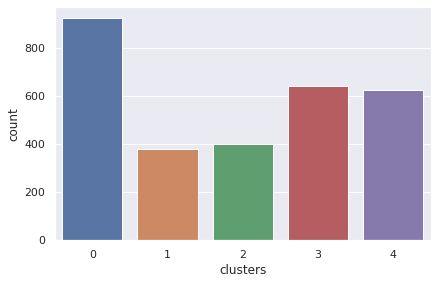

In [46]:
# plotting the number of genres in each cluster
sns.countplot(x='clusters', data=copiedDf)

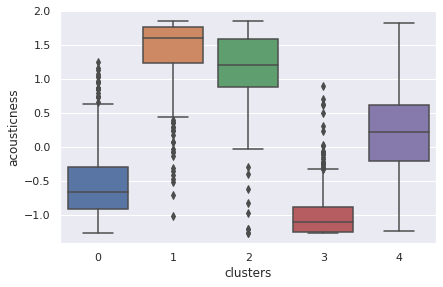

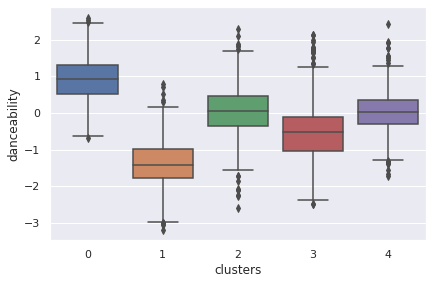

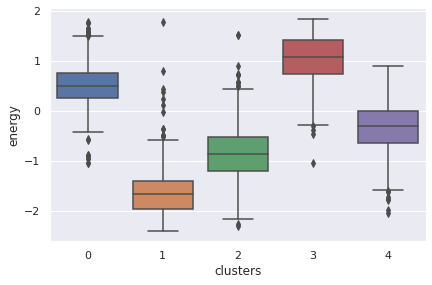

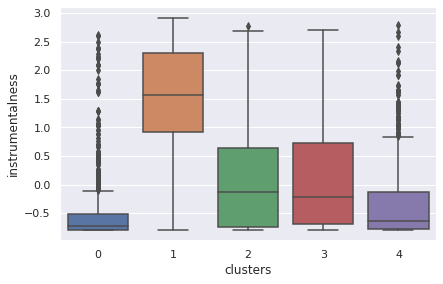

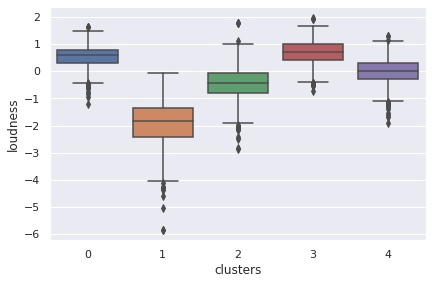

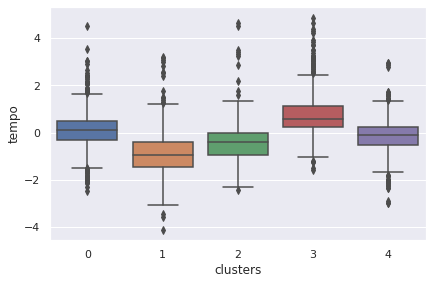

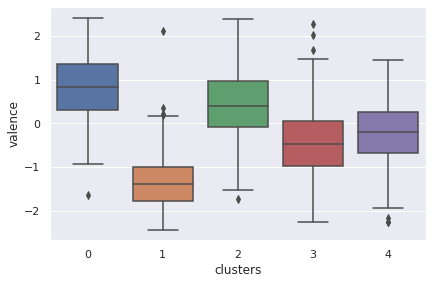

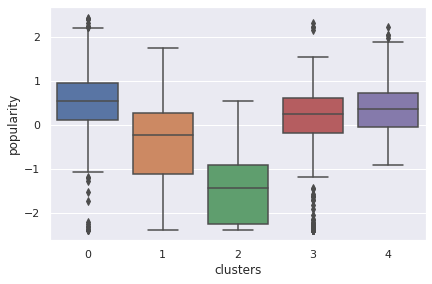

In [47]:
#Plotting the boxplot
cols = copiedDf.select_dtypes('number').columns.drop(['clusters'])
for i in cols:
    plt.figure()
    sns.boxplot(x='clusters', y=i, data=copiedDf)

**Interpreting each cluster with respect to the independet variables:**

All interpretations will be based on the median value of the box plots.\
\
Cluster0: Had music genres that had low acousticness, highest dancebality, high energy, high vocals (low instrumentalness), relatively high loudness, medium tempo, happy songs due to high valence, and lastly they seem to be the most popular music types.\
\
Cluster1: Music genres in this cluster had the highest acousticness, very low dancebality, lowest energy, highest instrumentalness (low vocals used), lowest loudness, the lowest tempo, mainly sad songs (lowest valence), and had medium popularity.\
\
Cluster2: The genres had high acousticness where lots of electrical amplifications were used, medium to high dancebality, low energy, low instrumentalness, relatively quite(low loudness), meduim tempo (not very fast paced), high valence (happy songs), and had the lowest popularity.\
\
Cluster3: Music genres had lowest acousticness, meduim to low dancebality, highest energy, low instrumentalness hence vocals were used, very loud, very fast paced (highest tempo), medium to low valence thus songs had a mix between happy and sad vibes, and medium popularity.\
\
Cluster4: The last group of music genres had medium acousticness, meduim to high dancebality, meduim energy, low instrumentalness, relatively high loudness, meduim paced songs(meduim tempo), meduim valenc, and high popularity




# **Bouns Query 5**

In [76]:
# getting the words frequency in genres and converting the series to a dataframe
countDf=pd.Series(' '.join(df.genres).split()).value_counts().to_frame()
countDf

,0
pop,240
indie,237
rock,183
metal,132
classical,106
hop,103
hip,102
jazz,96
folk,80
punk,66


In [81]:
# choosing the words having frequency greater than 30
filteredDf=countDf[(countDf > 30).any(1)]
filteredDf=filteredDf.reset_index()
filteredDf

,index,0
0,pop,240
1,indie,237
2,rock,183
3,metal,132
4,classical,106
5,hop,103
6,hip,102
7,jazz,96
8,folk,80
9,punk,66


In [82]:
# renaming the coulmns to easily plot them
filteredDf.rename(columns = {'index': 'genres'}, inplace = True) 
filteredDf.columns.values[1] = 'frequency'
filteredDf

,genres,frequency
0,pop,240
1,indie,237
2,rock,183
3,metal,132
4,classical,106
5,hop,103
6,hip,102
7,jazz,96
8,folk,80
9,punk,66


Text(0.5, 0, 'genre')

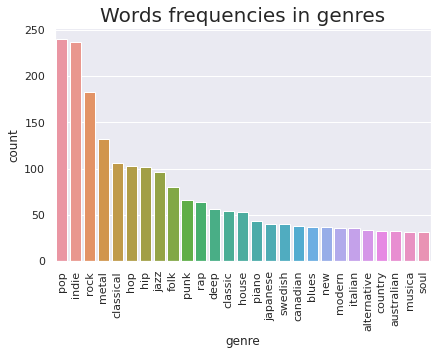

In [83]:
#plotting the frequencies
g = sns.barplot(x=filteredDf['genres'], y='frequency', data=filteredDf)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Words frequencies in genres', size=20)
plt.ylabel('count')
plt.xlabel('genre')

**Q5 Answer:** \
The main genres categories that have the highest subcategories are pop, indie and rock.